# Loading the dataset

In [2]:
import pandas as pd

data = pd.read_csv('LinearRegressionData.csv')

data.shape

(84, 2)

In [3]:
data.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


# Visualizing the dataset

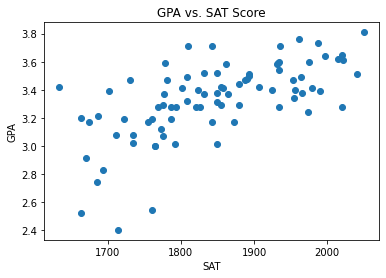

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data.SAT, data.GPA)
plt.title('GPA vs. SAT Score')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Checking Outliers using boxplot

<AxesSubplot:>

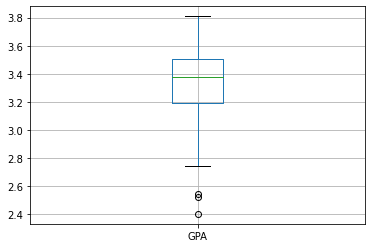

In [5]:
data.boxplot(column=['GPA'])

In [6]:
import numpy as np
import scipy.stats as stats

# #find absolute value of z-score for each observation
# z = np.abs(stats.zscore(data))

# #only keep rows in dataframe with all z-scores less than absolute value of 3 
# data_clean = data[(z<3).all(axis=1)]

# #find how many rows are left in the dataframe 
# data_clean.shape

In [7]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(81, 2)

<AxesSubplot:>

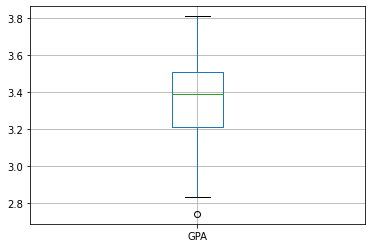

In [8]:
data_clean.boxplot(column=['GPA'])

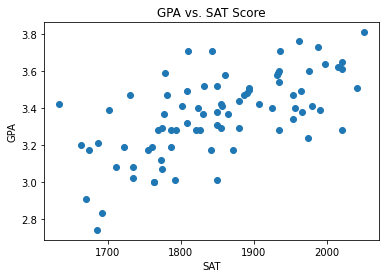

In [9]:
plt.scatter(data_clean.SAT, data_clean.GPA)
plt.title('GPA vs. SAT Score')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Simple Linear Regression 

In [10]:
import statsmodels.api as sm

#define response variable
y = data_clean['GPA']

#define explanatory variable
x = data_clean[['SAT']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     53.15
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.07e-10
Time:                        10:48:57   Log-Likelihood:                 28.779
No. Observations:                  81   AIC:                            -53.56
Df Residuals:                      79   BIC:                            -48.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8452      0.346      2.445      0.0